In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#check if the data is in the form of array or dataframe
df.shape

(25, 2)

[]

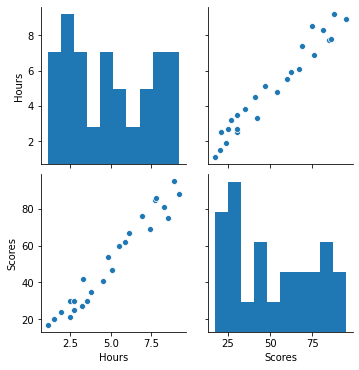

In [8]:
#check if it is a linear regression
sns.pairplot(df)
plt.plot()

# Splitting

In [17]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  


In [18]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=43)

In [24]:
X_train.shape

(17, 1)

In [25]:
X_test.shape

(8, 1)

# Train the model

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
#plotting the regression line
line=model.coef_*X+model.intercept_
line

array([[26.55744583],
       [51.03722097],
       [33.14815452],
       [83.0492346 ],
       [35.97274396],
       [17.1421477 ],
       [89.63994329],
       [54.80334022],
       [81.16617498],
       [28.44050546],
       [75.5169961 ],
       [58.56945947],
       [45.38804209],
       [34.08968433],
       [13.37602845],
       [86.81535385],
       [26.55744583],
       [20.90826696],
       [60.45251909],
       [72.69240666],
       [28.44050546],
       [48.21263153],
       [38.7973334 ],
       [67.9847576 ],
       [76.45852591]])

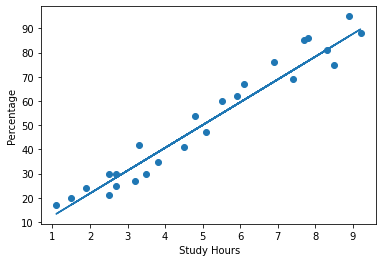

In [30]:
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel(' Study Hours')  
plt.ylabel('Percentage') 
plt.show()

# Prediction

In [31]:
y_predict=model.predict(X_test)

In [32]:
y_predict

array([89.63994329, 75.5169961 , 17.1421477 , 34.08968433, 76.45852591,
       86.81535385, 81.16617498, 45.38804209])

In [34]:
dt=pd.DataFrame({"Predictions":y_predict,"Actual Score":y_test})

In [35]:
dt

,Predictions,Actual Score
0,89.639943,88
1,75.516996,85
2,17.142148,20
3,34.089684,42
4,76.458526,86
5,86.815354,95
6,81.166175,81
7,45.388042,41


In [36]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
np.mean(scores)

0.9180771341891051

In [38]:
from sklearn import metrics  
metrics.r2_score(y_test,y_predict)

0.9393343640876535

In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 5.521431556691904


In [42]:
score = model.predict([[9.25]])
score
print("Predicted score if a student studies for 9.25 hrs/ day is {}".format(score))

Predicted score if a student studies for 9.25 hrs/ day is [90.1107082]
